In [1]:
'''Linear Regression (Single Variable) Implementation using Python'''
from random import randint
import matplotlib.pyplot as plt

In [2]:
def hypothesis(theta, small_x):
    '''Hypothesis for a particular theta and sample point'''
    return theta * small_x

In [3]:
def predict(theta):
    '''Returns list of predictions for all entries in X on the basis of theta'''
    return [hypothesis(theta, p) for p in X]

In [4]:
def compute_cost(theta):
    '''Computes cost at theta'''
    cost = 0
    for i in range(100):
        hyp = hypothesis(theta, X[i])
        cost = (cost + ((hyp - Y[i]) * (hyp - Y[i])))
    return 0.005 * cost # 1/(2*m) * cost # here m is 200

In [5]:
def derivative(costFn, theta):
    '''Computes the numerical derivative of a function.'''
    change_in_input = 0.00000001
    change_in_output = (costFn(theta + change_in_input) - costFn(theta))
    slope = change_in_output / change_in_input
    return slope

In [6]:
def gradient_descent(logFreq):
    '''Computes gradient_descent'''
    cur_theta = 1 # Choose any starting point
    min_cost = compute_cost(cur_theta)
    prv_deri = 54673257461630679457 # To identify first iteration, setting a huge prime number
    itr = 0
    while True:
        #
        # Update minimum cost (for debugging and output)
        cur_cost = compute_cost(cur_theta)
        if cur_cost < min_cost:
            min_cost = cur_cost
        itr = itr + 1
        if(itr % logFreq == 0):
            print("Current Cost: ", cur_cost)
        #
        # Compute derivative at cur_theta
        d_by_dtheta = derivative(compute_cost, cur_theta)
        #
        # Only in case of first iteration, set the current derivative as the previous derivative
        if prv_deri == 54673257461630679457:
            prv_deri = d_by_dtheta
        #
        # Learning rate in below update equation is very important. If the learning rate
        # isn't appropriately set, gradient_descent may not converge and will keep shooting
        # across minima
        # Learning Rate set in below equation is: 0.000000001
        cur_theta = (cur_theta - (0.000000001 * d_by_dtheta))
        #
        # Uncomment below to view progress
        #print("cost:%f | theta:%f | derivative: %f" % (cur_cost, cur_theta, d_by_dtheta))
        #
        # Stops in case...
        #   Derivative reaches zero OR
        #   derivative offshoots across the minima (assuming learning rate is appropriately set)
        if d_by_dtheta == 0 or ((d_by_dtheta > 0 and prv_deri < 0) or (d_by_dtheta < 0 and prv_deri > 0)):
            return cur_theta
        #
        # Update previous derivative to decide stopping gradient_descent in next iterations
        prv_deri = d_by_dtheta

In [7]:
# Generating some random data for X and computing Y with some randomness
X = [randint(820, 2500) for p in range(0, 200)]
Y = [(((randint(4000, 5000) * p) if (randint(0, 3) == 1) else (randint(4000, 6000) * p))/1000) for p in X]

In [8]:
# Running gradient_descent to compute optimum theta (solution)
predicted_theta = gradient_descent(100)

Current Cost:  12545871.52739454
Current Cost:  7076598.736042473
Current Cost:  4089445.7547180667
Current Cost:  2457952.2822788637
Current Cost:  1566879.4188720188
Current Cost:  1080202.1140901044
Current Cost:  814393.5488411986
Current Cost:  669216.8722304091
Current Cost:  589925.720304582
Current Cost:  546619.2677914904
Current Cost:  522966.5805681895
Current Cost:  510048.1911048864
Current Cost:  502992.5536747444
Current Cost:  499138.9758502783
Current Cost:  497034.267011776
Current Cost:  495884.7380265914
Current Cost:  495256.89971348055
Current Cost:  494913.9932229928
Current Cost:  494726.707934544
Current Cost:  494624.4183076228
Current Cost:  494568.55076833046
Current Cost:  494538.0375891785
Current Cost:  494521.3721981183
Current Cost:  494512.2700536786
Current Cost:  494507.2987315155
Current Cost:  494504.5835428587
Current Cost:  494503.10058660584
Current Cost:  494502.2906390573
Current Cost:  494501.8482686049
Current Cost:  494501.6066586958
Curren

In [9]:
# Output findings
print('predicted_theta:%f' % predicted_theta)
print('predicted_cost:%f' % compute_cost(predicted_theta))

predicted_theta:4.811398
predicted_cost:494501.315884


In [10]:
# Generate values to plot
PREDICTION = [hypothesis(predicted_theta, p) for p in X]

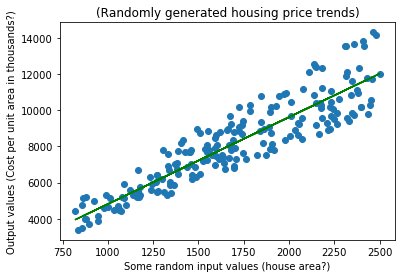

In [11]:
# Plot raw data
plt.scatter(X, Y)

# Plot Prediction Line
plt.plot(X, PREDICTION, 'g')

# Set axis labels and plot title
plt.xlabel('Some random input values (house area?)')
plt.ylabel('Output values (Cost per unit area in thousands?)')
plt.title('(Randomly generated housing price trends)')

plt.show()